In [1]:
import requests

address = input()
url = "https://loc.geopunt.be/v4/Location?q=" + address
response = requests.get(url)
response.json()

{'LocationResult': [{'Municipality': 'Saint-Gilles',
   'Zipcode': None,
   'Thoroughfarename': 'Place Maurice Van Meenen',
   'Housenumber': None,
   'ID': 5070,
   'FormattedAddress': 'Maurice Van Meenenplein, Sint-Gillis',
   'Location': {'Lat_WGS84': 50.8247143208073,
    'Lon_WGS84': 4.345810399998934,
    'X_Lambert72': 148383.57,
    'Y_Lambert72': 168254.1},
   'LocationType': 'urbis_straat',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 50.824054523484655,
     'Lon_WGS84': 4.3446162714998255,
     'X_Lambert72': 148299.41,
     'Y_Lambert72': 168180.73},
    'UpperRight': {'Lat_WGS84': 50.82537410584774,
     'Lon_WGS84': 4.347004562003352,
     'X_Lambert72': 148467.73,
     'Y_Lambert72': 168327.47}}}]}

In [2]:
result = response.json()
result_dict = dict(result)
x = result_dict['LocationResult'][0]['Location']['X_Lambert72']
print("x:", x)
y = result_dict['LocationResult'][0]['Location']['Y_Lambert72']
print("y:", y)

x: 148383.57
y: 168254.1


In [3]:
left = x - 100
right = x + 100
top = y + 100
bottom = y - 100

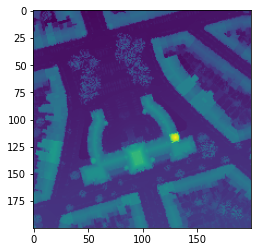

In [4]:
import rasterio as rio
import matplotlib.pyplot as plt


for i in range(1, 10):
    dataset = rio.open(f"C:\\Users\\vpala\\Artificial Intelligence\\BeCode\\3D-houses\\dataset\\DHMVIIDSMRAS1m_k0{i}\\GeoTIFF\\DHMVIIDSMRAS1m_k0{i}.tif")
    if x >= dataset.bounds.left and x <= dataset.bounds.right and y >= dataset.bounds.bottom and y <= dataset.bounds.top:
        window = dataset.window(left=left, bottom=bottom, right=right, top=top)
        plt.imshow(dataset.read(1, window=window))
        plt.show()
for i in range(10, 44):
    dataset = rio.open(f"C:\\Users\\vpala\\Artificial Intelligence\\BeCode\\3D-houses\\dataset\\DHMVIIDSMRAS1m_k{i}\\GeoTIFF\\DHMVIIDSMRAS1m_k{i}.tif")
    if x >= dataset.bounds.left and x <= dataset.bounds.right and y >= dataset.bounds.bottom and y <= dataset.bounds.top:
        window = dataset.window(left=left, bottom=bottom, right=right, top=top)
        plt.imshow(dataset.read(1, window=window))
        plt.show()


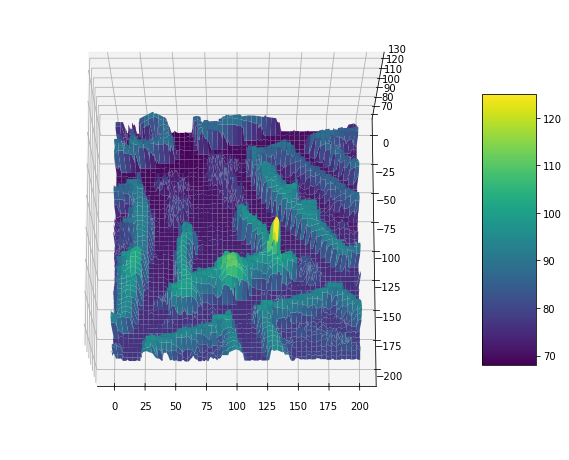

In [5]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

for i in range(1, 10):
    dataset = rio.open(f"C:\\Users\\vpala\\Artificial Intelligence\\BeCode\\3D-houses\\dataset\\DHMVIIDSMRAS1m_k0{i}\\GeoTIFF\\DHMVIIDSMRAS1m_k0{i}.tif")
    if x >= dataset.bounds.left and x <= dataset.bounds.right and y >= dataset.bounds.bottom and y <= dataset.bounds.top:
        window = dataset.window(left=left, bottom=bottom, right=right, top=top)
        surf = dataset.read(1, window=window)
        X = np.arange(0, surf.shape[0]*1, 1)
        Y = np.arange(0, surf.shape[1]*-1, -1)
        X, Y = np.meshgrid(X,Y)
        fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
        surf = ax.plot_surface(X, Y, surf, cmap=plt.cm.magma)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        fig.set_size_inches(10, 10)
        ax.view_init(75, -90)
        plt.show()

for i in range(10, 44):
    dataset = rio.open(f"C:\\Users\\vpala\\Artificial Intelligence\\BeCode\\3D-houses\\dataset\\DHMVIIDSMRAS1m_k{i}\\GeoTIFF\\DHMVIIDSMRAS1m_k{i}.tif")
    if x >= dataset.bounds.left and x <= dataset.bounds.right and y >= dataset.bounds.bottom and y <= dataset.bounds.top:
        window = dataset.window(left=left, bottom=bottom, right=right, top=top)
        surf = dataset.read(1, window=window)
        X = np.arange(0, surf.shape[0]*1, 1)
        Y = np.arange(0, surf.shape[1]*-1, -1)
        X, Y = np.meshgrid(X,Y)
        fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
        surf = ax.plot_surface(X, Y, surf, cmap=plt.cm.viridis)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        fig.set_size_inches(10, 10)
        ax.view_init(75, -90)
        plt.show()


In [6]:
import rasterio as rio
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go

for i in range(1, 10):
    dataset = rio.open(f"C:\\Users\\vpala\\Artificial Intelligence\\BeCode\\3D-houses\\dataset\\DHMVIIDSMRAS1m_k0{i}\\GeoTIFF\\DHMVIIDSMRAS1m_k0{i}.tif")
    if x >= dataset.bounds.left and x <= dataset.bounds.right and y >= dataset.bounds.bottom and y <= dataset.bounds.top:
        window = dataset.window(left=left, bottom=bottom, right=right, top=top)
        surf = dataset.read(1, window=window)
        X = np.arange(0, surf.shape[0]*1, 1)
        Y = np.arange(0, surf.shape[1]*-1, -1)
        X, Y = np.meshgrid(X,Y)
        pio.renderers.default = 'notebook_connected'
        fig = go.Figure(data=go.Surface(x=X, y=Y, z=surf))
        fig.show()

for i in range(10, 44):
    dataset = rio.open(f"C:\\Users\\vpala\\Artificial Intelligence\\BeCode\\3D-houses\\dataset\\DHMVIIDSMRAS1m_k{i}\\GeoTIFF\\DHMVIIDSMRAS1m_k{i}.tif")
    if x >= dataset.bounds.left and x <= dataset.bounds.right and y >= dataset.bounds.bottom and y <= dataset.bounds.top:
        window = dataset.window(left=left, bottom=bottom, right=right, top=top)
        surf = dataset.read(1, window=window)
        X = np.arange(0, surf.shape[0]*1, 1)
        Y = np.arange(0, surf.shape[1]*-1, -1)
        X, Y = np.meshgrid(X,Y)
        pio.renderers.default = 'notebook_connected'
        fig = go.Figure(data=go.Surface(x=X, y=Y, z=surf))
        fig.show()
